In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e5/sample_submission.csv
/kaggle/input/playground-series-s4e5/train.csv
/kaggle/input/playground-series-s4e5/test.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
train_df = pd.read_csv("/kaggle/input/playground-series-s4e5/train.csv")[:100000]
test_df = pd.read_csv("/kaggle/input/playground-series-s4e5/test.csv")

In [4]:
train_df.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [5]:
train_df.shape

(100000, 22)

In [6]:
y = train_df['FloodProbability']
X = train_df.drop(['FloodProbability'], axis = 1)

In [7]:
X = X.drop(['id'], axis = 1)

In [8]:
X.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,5,8,5,8,6,4,4,3,3,4,2,5,3,3,5,4,7,5,7,3
1,6,7,4,4,8,8,3,5,4,6,9,7,2,0,3,5,3,3,4,3
2,6,5,6,7,3,7,1,5,4,5,6,7,3,7,5,6,8,2,3,3
3,3,4,6,5,4,8,4,7,6,8,5,2,4,7,4,4,6,5,7,5
4,5,3,2,6,4,4,3,3,3,3,5,2,2,6,6,4,1,2,3,5


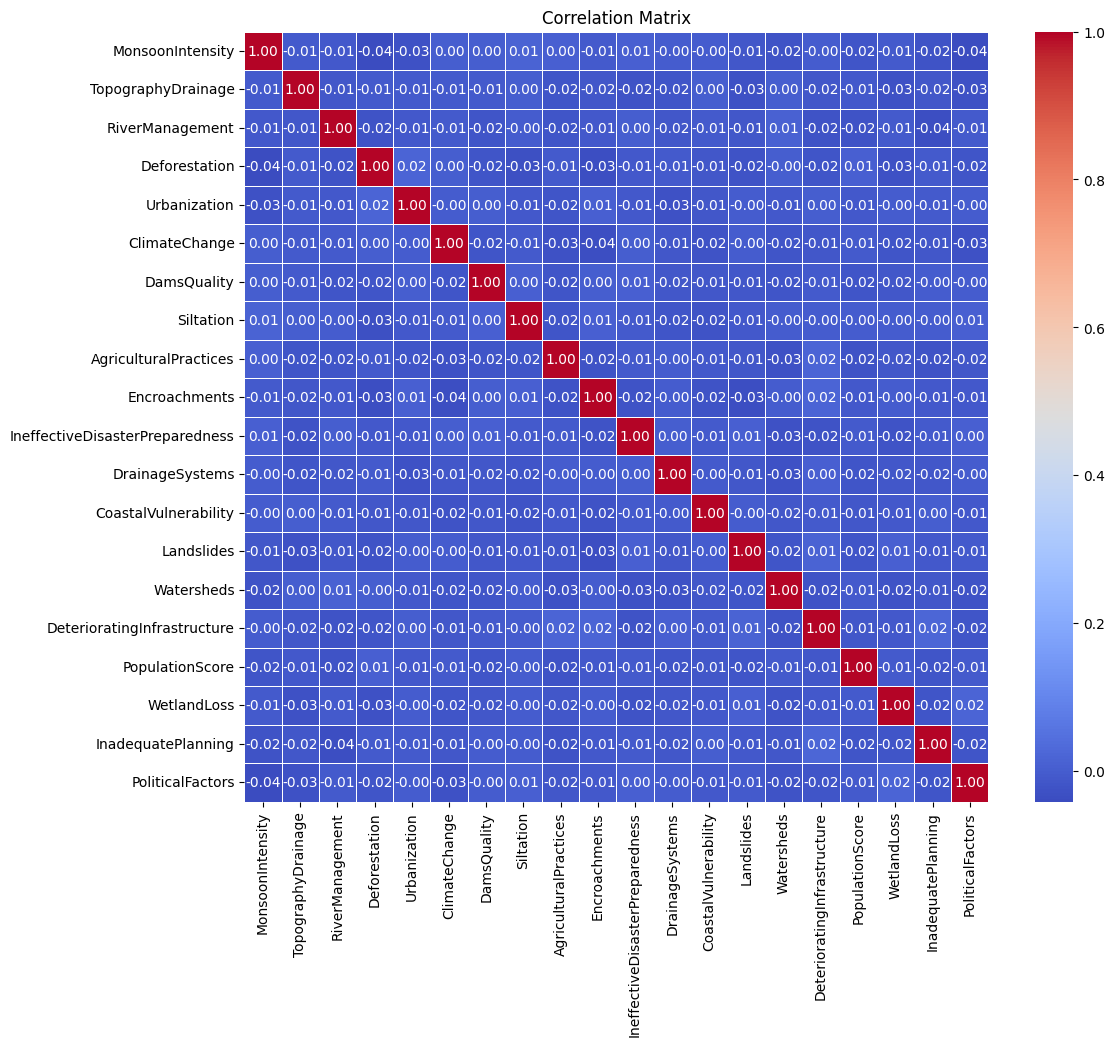

In [38]:
def plot_correlation_matrix(df):
    """
    Plots the correlation matrix for a given DataFrame using Seaborn.

    Parameters:
    df (pd.DataFrame): The input DataFrame.

    Returns:
    None
    """
    corr = df.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.show()
plot_correlation_matrix(X)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()




# Apply MinMaxScaler to the selected columns
scaled_data = scaler.fit_transform(X)

# Create a DataFrame with the scaled data
X = pd.DataFrame(scaled_data, columns=X.columns)

# Combine the 'id' column with the scaled data
# X = pd.concat([id_column, X], axis=1)
X.head()

In [ ]:
X.head()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X)
poly_feature_names = poly.get_feature_names_out(X.columns)
X = pd.DataFrame(poly_features, columns=poly_feature_names)
X.head()

In [43]:
num_cols=['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors']
def add_Features(X):
    X['Urbanization_ClimateChange'] = X['Urbanization'] * X['ClimateChange']
    X['Urbanization_Deforestation'] = X['Urbanization'] * X['Deforestation']
    X['Monsoon_RiverManagement'] = X['MonsoonIntensity'] * X['RiverManagement']
    X['Siltation_DamsQuality'] = X['Siltation'] * X['DamsQuality']
    X['ClimateChange_DisasterPreparedness'] = X['ClimateChange'] * X['IneffectiveDisasterPreparedness']
    print("here")
    # Ratio Features
    X['Urbanization_PopulationRatio'] = X['Urbanization'] / (X['PopulationScore'] + 1)
    X['Deforestation_AgricultureRatio'] = X['Deforestation'] / (X['AgriculturalPractices'] + 1)
    print("here2")
    # Aggregated Features
    X['EnvironmentalStress'] = X[['MonsoonIntensity', 'ClimateChange', 'Deforestation', 'Urbanization']].sum(axis=1)
    X['InfrastructureQuality'] = X[['DamsQuality', 'DrainageSystems', 'DeterioratingInfrastructure']].sum(axis=1)
    
    X['ClimateAnthropogenicInteraction'] = (X['MonsoonIntensity'] + X['ClimateChange']) \
                                              * (X['Deforestation'] + X['Urbanization'] + X['AgriculturalPractices'] + X['Encroachments'])
    X['InfrastructurePreventionInteraction'] = (X['DamsQuality'] + X['DrainageSystems'] + X['DeterioratingInfrastructure']) \
                                                * (X['RiverManagement'] + X['IneffectiveDisasterPreparedness'] + X['InadequatePlanning'])
    X['sum'] = X[num_cols].sum(axis=1)
    print("sum")
    X['std']  = X[num_cols].std(axis=1)
    print("std")
    X['mean'] = X[num_cols].mean(axis=1)
    print("mean")
    X['max']  = X[num_cols].max(axis=1)
    print("max")
    X['min']  = X[num_cols].min(axis=1)
    print("min")
    X['mode'] = X[num_cols].mode(axis=1)[0]
    print("mode")
    X['median'] = X[num_cols].median(axis=1)
    print("median")
    X['q_25th'] = X[num_cols].quantile(0.25, axis=1)
    print("q25")
    X['q_75th'] = X[num_cols].quantile(0.75, axis=1)
    X['skew'] = X[num_cols].skew(axis=1)
    X['kurt'] = X[num_cols].kurt(axis=1)
    print("kurt")
#     X['sum_72_76'] = X['sum'].isin(np.arange(72, 76))
#     print("sum7276")
    for i in range(10,100,10):
        X[f'{i}th'] = X[num_cols].quantile(i/100, axis=1)
        print(f'{i}')
    X['harmonic'] = len(num_cols) / X[num_cols].apply(lambda x: (1/x).mean(), axis=1)
    print("harmonic")
    X['geometric'] = X[num_cols].apply(lambda x: x.prod()**(1/len(x)), axis=1)
    print("geometric")
    X['zscore'] = X[num_cols].apply(lambda x: (x - x.mean()) / x.std(), axis=1).mean(axis=1)
    X['cv'] = X[num_cols].std(axis=1) / X[num_cols].mean(axis=1)
    print("cv")
    X['Skewness_75'] = (X[num_cols].quantile(0.75, axis=1) - X[num_cols].mean(axis=1)) / X[num_cols].std(axis=1)
    X['Skewness_25'] = (X[num_cols].quantile(0.25, axis=1) - X[num_cols].mean(axis=1)) / X[num_cols].std(axis=1)
    print("skewness")
    X['2ndMoment'] = X[num_cols].apply(lambda x: (x**2).mean(), axis=1)
    print("2nd")
    X['3rdMoment'] = X[num_cols].apply(lambda x: (x**3).mean(), axis=1)
    print("3rd")
    X['entropy'] = X[num_cols].apply(lambda x: -1*(x*np.log(x)).sum(), axis=1)
    print("entropy")
    return X
# X = add_Features(X)


In [10]:
X.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,90th,harmonic,geometric,zscore,cv,Skewness_75,Skewness_25,2ndMoment,3rdMoment,entropy
0,5,8,5,8,6,4,4,3,3,4,...,7.1,82.151589,4.397569,-7.771561e-17,0.372380,0.314252,-0.971324,25.00,147.50,-151.546500
1,6,7,4,4,8,8,3,5,4,6,...,8.0,0.000000,0.000000,-6.661338e-17,0.488606,0.674955,-0.740273,27.10,176.00,-157.930509
2,6,5,6,7,3,7,1,5,4,5,...,7.0,76.242342,4.468658,-8.881784e-17,0.390386,0.672735,-1.009102,28.05,171.45,-166.426821
3,3,4,6,5,4,8,4,7,6,8,...,7.1,92.766427,4.933055,-1.089406e-16,0.315686,0.639633,-0.731010,29.60,181.00,-176.528802
4,5,3,2,6,4,4,3,3,3,3,...,6.0,58.394161,3.275062,-9.992007e-17,0.416910,0.932788,-0.566336,15.10,70.50,-98.348970


In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 60 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   MonsoonIntensity                     100000 non-null  int64  
 1   TopographyDrainage                   100000 non-null  int64  
 2   RiverManagement                      100000 non-null  int64  
 3   Deforestation                        100000 non-null  int64  
 4   Urbanization                         100000 non-null  int64  
 5   ClimateChange                        100000 non-null  int64  
 6   DamsQuality                          100000 non-null  int64  
 7   Siltation                            100000 non-null  int64  
 8   AgriculturalPractices                100000 non-null  int64  
 9   Encroachments                        100000 non-null  int64  
 10  IneffectiveDisasterPreparedness      100000 non-null  int64  
 11  DrainageSystem

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
x_train.shape

(80000, 60)

In [36]:
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import roc_auc_score

class FloodingPredictionModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FloodingPredictionModel, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.05)
        self.layer2 = nn.Linear(hidden_size, hidden_size // 2)
        self.output_layer = nn.Linear(hidden_size // 2, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.layer2(x)
        x = self.relu(x)
        x = self.output_layer(x)
        x = self.sigmoid(x)
        return x

    def fit(self, x_train, y_train, epochs, learning_rate):
        criterion = nn.BCELoss()
        optimizer = optim.Adam(self.parameters(), lr=learning_rate)
        
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(x_train)
        x_train = pd.DataFrame(scaled_data, columns=x_train.columns)
        
#         x_train = self.preprocess(x_train)
        
        x_train = torch.tensor(x_train.values, dtype=torch.float32)
        y_train = torch.tensor(y_train.values, dtype=torch.float32) 

        print("x_train shape:", x_train.shape)
        print("y_train shape:", y_train.shape)  
        
        for epoch in range(epochs):
            self.train()
            optimizer.zero_grad()
            outputs = self(x_train).squeeze()
            loss = criterion(outputs, y_train)
            loss.backward()
            optimizer.step()
            print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

    def predict(self, x_test):
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(x_test)
        x_test = pd.DataFrame(scaled_data, columns=x_test.columns)
#         x_test = self.preprocess(x_test)
        x_test = torch.tensor(x_test.values, dtype=torch.float32)
        self.eval()
        with torch.no_grad():
            outputs = self(x_test)
        return outputs.numpy()

    def score(self, x_test, y_test):
        y_pred = self.predict(x_test)
        return roc_auc_score(y_test, y_pred)
    def preprocess(self, X):
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(X)
        X = pd.DataFrame(scaled_data, columns=X.columns)
        X = add_Features(X)
        return X
        
        


# Usage
input_size = 60
hidden_size = 128
output_size = 1

model = FloodingPredictionModel(input_size, hidden_size, output_size)


# Below is stochastic

In [108]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import roc_auc_score
from torch.utils.data import DataLoader, TensorDataset


class FloodingPredictionModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FloodingPredictionModel, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
#         self.dropout = nn.Dropout(0.05)
        self.layer2 = nn.Linear(hidden_size, hidden_size // 2)
        self.output_layer = nn.Linear(hidden_size // 2, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
#         x = self.dropout(x)
        x = self.layer2(x)
        x = self.relu(x)
        x = self.output_layer(x)
        x = self.sigmoid(x)
        return x

    def fit(self, x_train, y_train, epochs, learning_rate, batch_size=32):
        criterion = nn.BCELoss()
        optimizer = optim.Adam(self.parameters(), lr=learning_rate)
        
        # Convert DataFrame to tensors
        x_train_tensor = torch.tensor(x_train.values, dtype=torch.float32)
        y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)  # No unsqueeze here
        
        # Create DataLoader
        train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        
        for epoch in range(epochs):
            self.train()
            epoch_loss = 0
            for batch_x, batch_y in train_loader:
                optimizer.zero_grad()
                outputs = self(batch_x).squeeze()
                loss = criterion(outputs, batch_y)
                loss.backward()
                optimizer.step()
                epoch_loss += loss.item()
            
            avg_loss = epoch_loss / len(train_loader)
            print(f'Epoch {epoch+1}/{epochs}, Loss: {avg_loss}')

    def predict(self, x_test):
        x_test_tensor = torch.tensor(x_test.values, dtype=torch.float32)
        self.eval()
        with torch.no_grad():
            outputs = self(x_test_tensor).squeeze()
        return outputs.numpy()

    def score(self, x_test, y_test):
        y_pred = self.predict(x_test)
        return roc_auc_score(y_test, y_pred)
    
    

input_size = 60
hidden_size = 128
output_size = 1
batch_size = 32

model = FloodingPredictionModel(input_size, hidden_size, output_size)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
def cross_val_model(x, y, input_size, hidden_size, output_size, epochs, learning_rate, batch_size=32, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = []

    for train_index, val_index in kf.split(x):
        x_train, x_val = x.iloc[train_index], x.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        model = FloodingPredictionModel(input_size, hidden_size, output_size)
        model.fit(x_train, y_train, epochs, learning_rate)

        score = r2_score(y_val, model.predict(x_val))
        scores.append(score)
        print(f'R2 Score: {score}')

    avg_score = np.mean(scores)
    print(f'Average R2 Score: {avg_score}')
    return avg_score
avg_score = cross_val_model(X[:10000], y[:10000], 20, 128, 1, 1000, 0.001)
print(avg_score)

In [37]:
model.fit(x_train, y_train, epochs=100, learning_rate=0.001)
predictions = model.predict(x_test)

x_train shape: torch.Size([80000, 60])
y_train shape: torch.Size([80000])
Epoch 1/100, Loss: 0.6942396759986877
Epoch 2/100, Loss: 0.6922620534896851
Epoch 3/100, Loss: 0.6908610463142395
Epoch 4/100, Loss: 0.6899412274360657
Epoch 5/100, Loss: 0.6894388794898987
Epoch 6/100, Loss: 0.6892918944358826
Epoch 7/100, Loss: 0.6893863081932068
Epoch 8/100, Loss: 0.6895316243171692
Epoch 9/100, Loss: 0.6895699501037598
Epoch 10/100, Loss: 0.6894800662994385
Epoch 11/100, Loss: 0.6893150210380554
Epoch 12/100, Loss: 0.689155101776123
Epoch 13/100, Loss: 0.6890287399291992
Epoch 14/100, Loss: 0.6889697313308716
Epoch 15/100, Loss: 0.6889578700065613
Epoch 16/100, Loss: 0.6889750957489014
Epoch 17/100, Loss: 0.6890050172805786
Epoch 18/100, Loss: 0.6890299916267395
Epoch 19/100, Loss: 0.6890409588813782
Epoch 20/100, Loss: 0.6890287399291992
Epoch 21/100, Loss: 0.6890004277229309
Epoch 22/100, Loss: 0.6889614462852478
Epoch 23/100, Loss: 0.6889192461967468
Epoch 24/100, Loss: 0.6888837814331055


In [38]:
predictions[:10]

array([[0.4894747 ],
       [0.59884375],
       [0.498969  ],
       [0.53457904],
       [0.5416654 ],
       [0.4989068 ],
       [0.5192887 ],
       [0.5455705 ],
       [0.4819642 ],
       [0.5175306 ]], dtype=float32)

In [39]:
y_test[:10]

57441    0.510
99647    0.590
36234    0.485
54679    0.550
4984     0.535
30365    0.500
62954    0.510
85279    0.555
84809    0.450
39918    0.540
Name: FloodProbability, dtype: float64

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print(mean_absolute_error(y_test, predictions))
print(mean_squared_error(y_test, predictions))
print(r2_score(y_test, predictions))

0.015806491254210474
0.0004025674584310979
0.8468132856138166


In [46]:

test_df.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,...,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,...,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,...,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,...,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,...,4,3,2,6,4,6,8,4,5,5


In [47]:

pred2 = model.predict(add_Features(test_df.drop(['id'], axis = 1)))
pred2[:10]
                                        

here
here2
sum
std
mean
max
min
mode
median
q25
kurt
10
20
30
40
50
60
70
80
90
harmonic
geometric
cv
skewness
2nd
3rd
entropy


array([[0.5765629 ],
       [0.46273744],
       [0.45004135],
       [0.46155933],
       [0.46232164],
       [0.5025163 ],
       [0.5377633 ],
       [0.5329566 ],
       [0.46251935],
       [0.577977  ]], dtype=float32)

In [48]:
sample_sub = pd.read_csv("/kaggle/input/playground-series-s4e5/sample_submission.csv")

In [49]:
sample_sub[:10]

,id,FloodProbability
0,1117957,0.5
1,1117958,0.5
2,1117959,0.5
3,1117960,0.5
4,1117961,0.5
5,1117962,0.5
6,1117963,0.5
7,1117964,0.5
8,1117965,0.5
9,1117966,0.5


In [50]:
sub=sample_sub[['id']]
sub['FloodProbability'] = pred2
sub[:10]

,id,FloodProbability
0,1117957,0.576563
1,1117958,0.462737
2,1117959,0.450041
3,1117960,0.461559
4,1117961,0.462322
5,1117962,0.502516
6,1117963,0.537763
7,1117964,0.532957
8,1117965,0.462519
9,1117966,0.577977


In [61]:
sub

,id,FloodProbability
0,1117957,0.576563
1,1117958,0.462737
2,1117959,0.450041
3,1117960,0.461559
4,1117961,0.462322
...,...,...
745300,1863257,0.475593
745301,1863258,0.443855
745302,1863259,0.622124
745303,1863260,0.554832


In [ ]:
sample_sub[30:40]

In [60]:
sub.to_csv('submission.csv', index=False)